## Vehicles Dataset Analysis

In [96]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv(r'C:\Users\ahaqu\Downloads\vehicles_us (1).csv')
df.sample(n=10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
47366,4950,2008.0,toyota corolla,excellent,4.0,gas,127000.0,automatic,sedan,blue,NaN,2018-12-25,43
25407,34988,2016.0,gmc yukon,like new,8.0,gas,69400.0,automatic,SUV,brown,NaN,2019-02-08,6
12752,5910,NaN,ford focus se,excellent,4.0,gas,151480.0,automatic,sedan,NaN,NaN,2019-01-15,7
47127,12800,2006.0,toyota tacoma,excellent,4.0,gas,113384.0,manual,truck,white,NaN,2019-02-13,20
46140,3500,2006.0,hyundai sonata,excellent,6.0,gas,139000.0,automatic,sedan,grey,NaN,2018-07-09,36
37672,23999,2017.0,ram 1500,excellent,8.0,gas,64000.0,automatic,pickup,blue,1.0,2018-06-22,53
21378,19995,2016.0,honda odyssey,excellent,6.0,gas,30472.0,automatic,van,white,NaN,2018-07-27,13
24761,10900,2013.0,gmc acadia,excellent,6.0,gas,97000.0,manual,SUV,white,NaN,2018-06-07,20
25491,4750,2009.0,toyota prius,excellent,4.0,hybrid,159000.0,automatic,hatchback,silver,NaN,2018-05-14,3
35368,15988,2012.0,bmw x5,good,6.0,diesel,78939.0,automatic,SUV,grey,1.0,2018-05-29,62


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


By pulling up the info on each column we can see what datatype has been assigned to it. We need to change the 'date_posted' column to datetime.
We will also be checking each column for duplicates and missing values and leaving the missing values black apart from the model_year columm where we will be adding 0 in the rows with missing values.

In [99]:
df.duplicated().sum()

0

There are no duplicate rows in the dataframe

In [100]:
df['price'].isna().sum()

0

In [101]:
df['model_year'].isna().sum()


3619

While the 'price' column has no missing data there are 3619 missing values in the 'model_year' column. We will be using the median value of models to replace the missing values below.

In [102]:
df['model_year']=df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'))
df['model_year'].isna().sum()
df['model_year'].astype('int64')
df['model_year'].sample(n=20)




34496    2007.0
36193    2008.0
38867    2014.0
46706    2015.0
39027    2017.0
1544     2008.0
17452    2005.0
18105    2010.0
10571    2018.0
47230    2009.0
25552    2015.0
20352    2006.0
37943    2009.0
48953    2008.0
46300    2007.0
37184    2007.0
42520    2015.0
35976    2008.0
18398    2005.0
37755    2013.0
Name: model_year, dtype: float64

In [103]:
df['condition'].isna().sum()


0

In [104]:
df['cylinders'].isna().sum()


5260

The 'condition' column has no missing values, however the 'cylinders' column has 5260 missing values. We will be using the media of the model to fill in the missing values.

In [105]:
df['cylinders']=df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'))

In [106]:
df['cylinders'].isna().sum()

0

In [107]:
df['condition'].isna().sum()

0

In [108]:
df['days_listed'].isna().sum()

0

In [109]:
df['fuel'].isna().sum()

0

In [110]:
df['model'].isna().sum()

0

In [111]:
df['odometer'].isna().sum()

7892

The 'conditions', 'days_listed', 'fuel', and 'model' columns have no missing values but the 'odometer' column has 7892 missing values.We will be using the median of the odometers based on their model_year to fill in the missing values.

In [112]:
df['odometer']=df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('median'))


In [113]:
df['paint_color'].isna().sum()
df['paint_color'].fillna('No Info')

0        No Info
1          white
2            red
3        No Info
4          black
          ...   
51520      black
51521      white
51522       blue
51523      black
51524    No Info
Name: paint_color, Length: 51525, dtype: object

We have replaced the missing values in the 'paint_color' column with "No Info"

In [114]:
df['price'].isna().sum()

0

In [115]:
df['transmission'].isna().sum()

0

In [132]:
df['is_4wd']=df['is_4wd'].astype(bool)



In [134]:
df['is_4wd'].isna().sum()

0

There were no missing values in the 'price' and 'transmission' column. We have converted the 'is_4wd' column into a True/False column and replaced missing values with False.

In [118]:
df['price'].astype('float')
df['date_posted'] = pd.to_datetime(df['date_posted'], format = '%Y-%m-%d') 

We have converted the datatype for 'price' and 'data_posted'.

The data has now been cleaned and is reay for analysis below.

## Data Analysis

We will now be creating a new column 'age' and be divding up the model_year into 'age categories'(based on newest model being 2022) for further analysis.
The catgories for 'age' are 
less than 5 years old ( from 2022)
5-10 years old
10-20 years old
more than 20 years old

In [119]:
df['age']= 2022-df['model_year']
def age_category(x):
    if x<5:return '<5'
    elif x>=5 and x<10: return '5-10'
    elif x>=10 and x<20: return '10-20'
    else: return '>20'
df['age_category']= df['age'].apply(age_category)

Each category is now its own mini dataframe

In [120]:
df_5 = df[df['age'] < 5]
df_10 = df[(df['age'] >= 5) & (df['age'] < 10)]
df_20 = df[(df['age'] >= 10) & (df['age'] <20)]
df_over20 = df[df['age'] >20]



You can see through the histograms below the older the cars the lower it has to be priced.

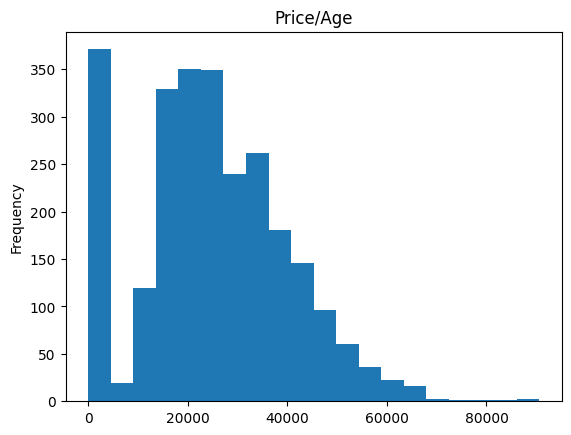

In [121]:
df_5['price'].plot(bins= 20, title ='Price/Age',kind= 'hist')
plt.show()

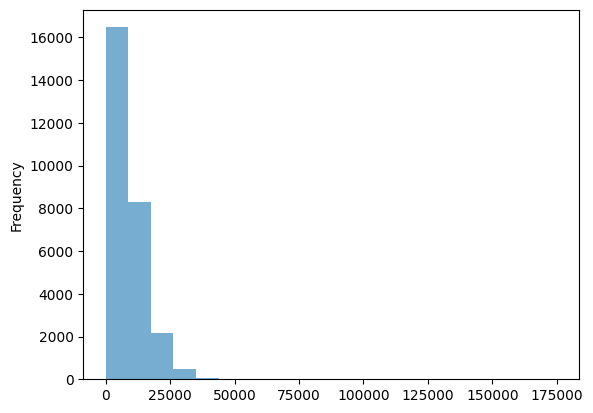

In [122]:
df_20['price'].plot (kind= 'hist', bins=20, alpha=0.6)
plt.show()

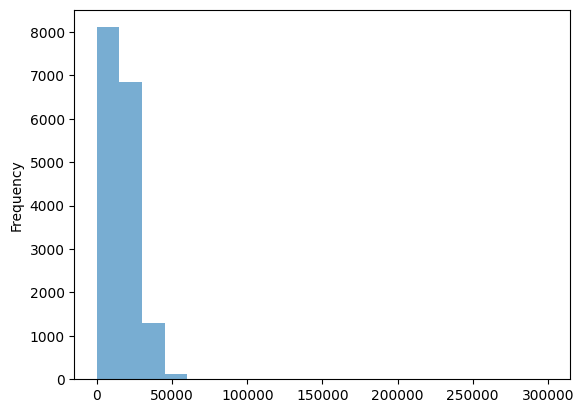

In [123]:
df_10['price'].plot (kind= 'hist', bins=20, alpha=0.6)
plt.show()

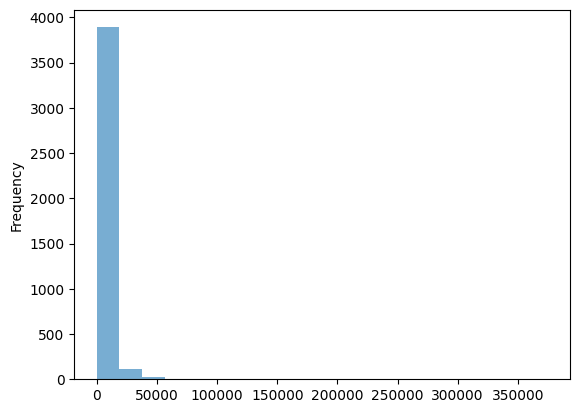

In [124]:
df_over20['price'].plot(kind='hist', bins=20, alpha=0.6)
plt.show()

You can see through the scatterplot below that the higher the odometer reading the lower the car is priced.

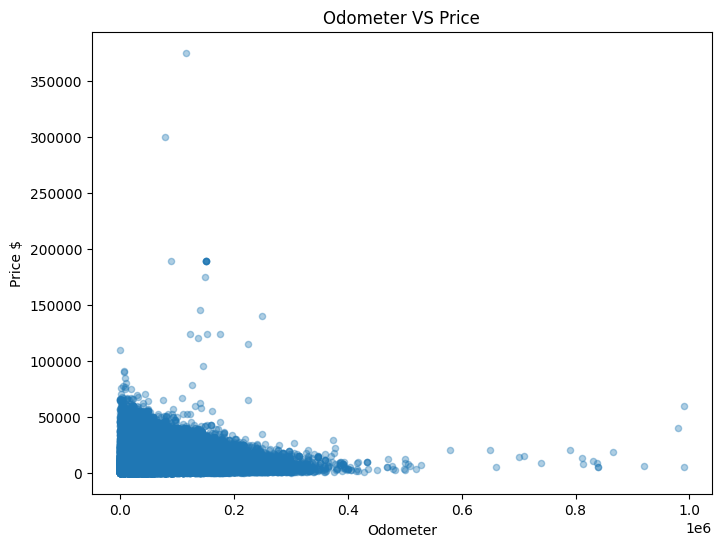

In [125]:
df.plot (x= 'odometer', y= 'price', kind = 'scatter', title = "Odometer VS Price", alpha = 0.36, figsize = [8, 6], xlabel=  'Odometer', ylabel = 'Price $')

plt.show()

You can see through the scatterplot below that the longer the car is listed the lower they're priced

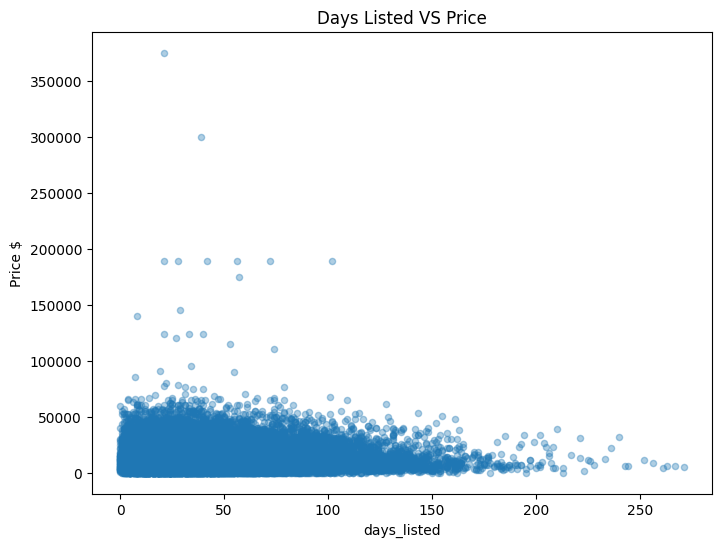

In [126]:
df.plot (x= 'days_listed', y= 'price', kind = 'scatter', title = "Days Listed VS Price", alpha = 0.36, figsize = [8, 6], xlabel=  'days_listed', ylabel = 'Price $')

plt.show()

In conclusion, cars that sell at high price points are the ones that are under 5 years old with low odometer reading.